In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Load the dataset
train_df = pd.read_csv('train_data.csv')
X_train = train_df.drop('Patv',axis = 1)
y_train = train_df['Patv']

In [2]:
# Load the dataset
test_df = pd.read_csv('test_data.csv')
X_test = test_df.drop('Patv',axis = 1)
y_test = test_df['Patv']

val_df = pd.read_csv('val_data.csv')
X_val = val_df.drop('Patv',axis = 1)
y_val = val_df['Patv']

In [3]:
params = {
    'objective': 'reg:squarederror',
    'eta': 0.3,
    'max_depth': 13,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'gamma': 0,
    'lambda': 1,
    'alpha': 0
}

dtrain = xgb.DMatrix(X_train, label=y_train)

# Train the model with the initial parameters
model = xgb.train(params, dtrain)

# Make predictions on test data
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

In [4]:
# xgb_model = xgb.XGBRegressor(base_score=0.5, objective='reg:squarederror',
#              learning_rate=0.15, max_delta_step=None, max_depth=15,
#              min_child_weight=3,n_estimators=50, n_jobs=16, num_parallel_tree=None,
#              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
#              subsample=None, tree_method=None, validate_parameters=1)

# xgb_model.fit(X_train, y_train)

In [5]:
dval = xgb.DMatrix(X_val)

y_val_pred = model.predict(dval)

mse_val = mean_squared_error(y_val, y_val_pred)
print("Validation set MSE:", np.sqrt(mse_val))

mae = mean_absolute_error(y_val, y_val_pred)
print("Validation set MAE:", mae)

mse_test = mean_squared_error(y_test, y_pred)
print("Testing set MSE:", np.sqrt(mse_test))

mae_test = mean_absolute_error(y_test, y_pred)
print("Testing set MAE:", mae_test)

Validation set MSE: 84.94190223237456
Validation set MAE: 46.718959382514164
Testing set MSE: 96.07237413662249
Testing set MAE: 57.6553888385958


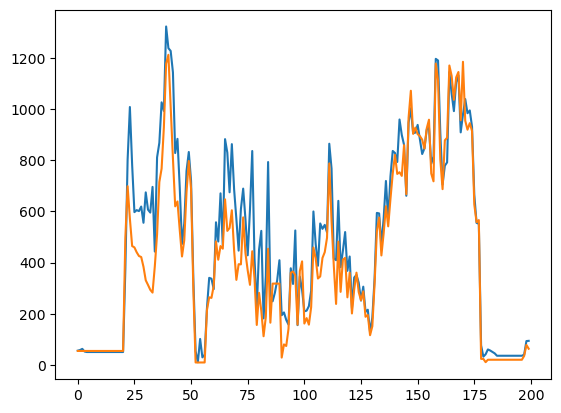

In [6]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data={'Predictions':y_pred, 'Actuals':y_test})
plt.plot(df['Predictions'][0:200])
plt.plot(df['Actuals'][0:200])

In [7]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.05, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [0.1, 1, 10]
# }

# # Instantiate the grid search object with 5-fold cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1,verbose=10)

# # Fit the grid search object to the training set
# grid_search.fit(X_train, y_train)

# # Print the best hyperparameters found by the grid search
# print(grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_test_pred = best_model.predict(X_test)
# mse_test = mean_squared_error(y_test, y_test_pred)
# print("Test set MSE:", mse_test)
# mae_test = mean_absolute_error(y_test, y_test_pred)
# print("Test set MAE:", mae_test)

In [8]:
# convert array into dataframe
DF = pd.DataFrame(y_pred)

# save the dataframe as a csv file
DF.to_csv("GBDT_Output.csv")